In [1]:

from models.microscopy_cnn import MicroscopyCNN
import torch
from scripts.dataset_loader import MicroscopyDataset
from torch.utils.data import DataLoader

MicroscopyCNN(
  (conv1): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=262144, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
MicroscopyCNN(
  (conv1): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(

In [2]:
model = MicroscopyCNN(in_channels=2, task='classification')

# model.load_state_dict(torch.load(r'C:\Users\nmp002\PycharmProjects\MPM-MachineLearning\trained_models\best_NADH_only_24FEB2025.pt', map_location=torch.device('cpu'),weights_only=True))
model.load_state_dict(torch.load(r'C:\Users\nmp002\PycharmProjects\MPM-MachineLearning\trained_models\epoch250_NADH_SHG.pt', map_location=torch.device('cpu'),weights_only=True))

<All keys matched successfully>

In [3]:
# Load data
csv_file=r"C:\Users\nmp002\PycharmProjects\MPM-MachineLearning\data\newData\labels.csv"
root_dir=r"C:\Users\nmp002\PycharmProjects\MPM-MachineLearning\data\newData"

dataset = MicroscopyDataset(
    csv_file=csv_file,
    root_dir=root_dir,
    # channels = ['nadh'],
    channels = ['nadh', 'shg'],
    transform=None
)

Total samples found: 290


In [4]:
specific_test_paths = []
# sample_indices = [23,0,3,20]
sample_indices = range(0,29)
eval_indices = [27, 4, 25, 7, 8]
for sample_index in eval_indices:
    if sample_index not in [25,7]:
        specific_test_paths.append(dataset.sample_wise_paths[sample_index])

print(specific_test_paths)
# print('\n------------------------------------------\n')
# print(dataset.sample_wise_paths)

[[(['C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov1\\nadh.tiff', 'C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov1\\shg.tiff'], 37), (['C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov2\\nadh.tiff', 'C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov2\\shg.tiff'], 37), (['C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov3\\nadh.tiff', 'C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov3\\shg.tiff'], 37), (['C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov4\\nadh.tiff', 'C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov4\\shg.tiff'], 37), (['C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov5\\nadh.tiff', 'C:\\Users\\nmp002\\PycharmProjects\\MPM-

In [5]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


def score_em(t, o):
    fpr, tpr, thresholds = roc_curve(t, o)
    score = auc(fpr, tpr)
    score_all = roc_auc_score(t, o)
    print(score_all)
    thresh = thresholds[np.argmax(tpr - fpr)]
    print(type(thresholds), type(thresh))
    preds = [out >= thresh for out in o]
    for tar,pred in zip(t, preds):
        print(f'{tar} -> {pred}')
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=score).plot()
    ConfusionMatrixDisplay.from_predictions(t, preds).plot()

In [20]:
print(specific_test_paths)

[[(['C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov1\\nadh.tiff', 'C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov1\\shg.tiff'], 37), (['C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov2\\nadh.tiff', 'C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov2\\shg.tiff'], 37), (['C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov3\\nadh.tiff', 'C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov3\\shg.tiff'], 37), (['C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov4\\nadh.tiff', 'C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov4\\shg.tiff'], 37), (['C:\\Users\\nmp002\\PycharmProjects\\MPM-MachineLearning\\data\\newData\\Sample_029\\fov5\\nadh.tiff', 'C:\\Users\\nmp002\\PycharmProjects\\MPM-

0.33999999999999997
<class 'numpy.ndarray'> <class 'numpy.float64'>
1 -> False
1 -> False
1 -> False
1 -> True
1 -> False
1 -> False
1 -> False
1 -> False
1 -> False
1 -> False
0 -> False
0 -> False
0 -> False
0 -> False
0 -> False
0.5
<class 'numpy.ndarray'> <class 'numpy.float64'>
1 -> True
1 -> False
0 -> False


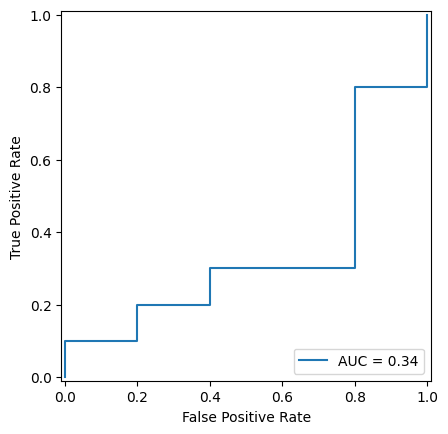

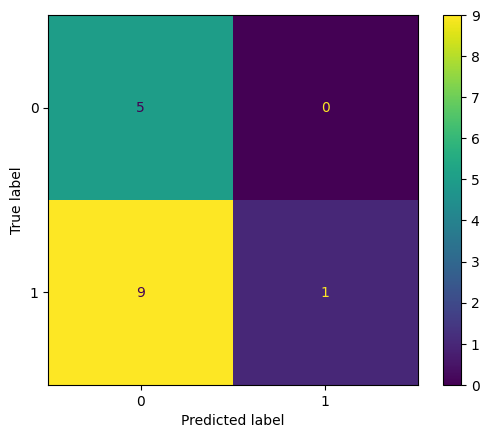

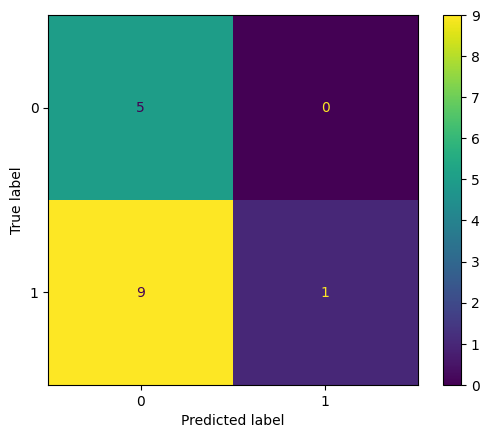

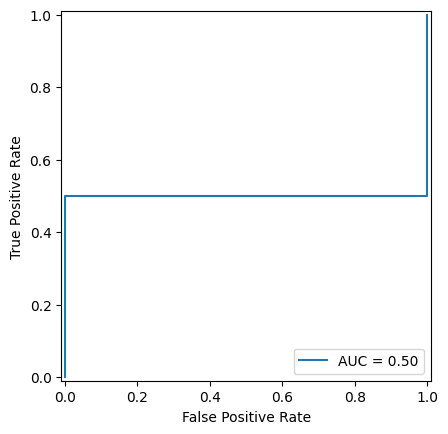

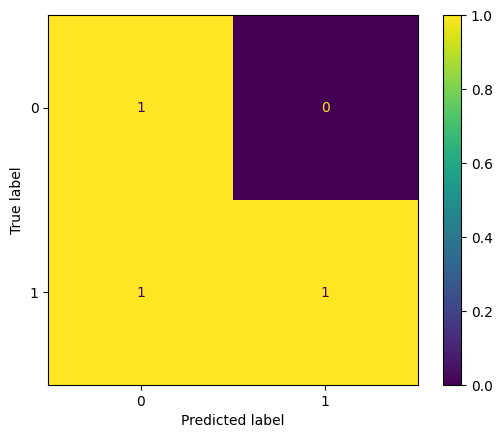

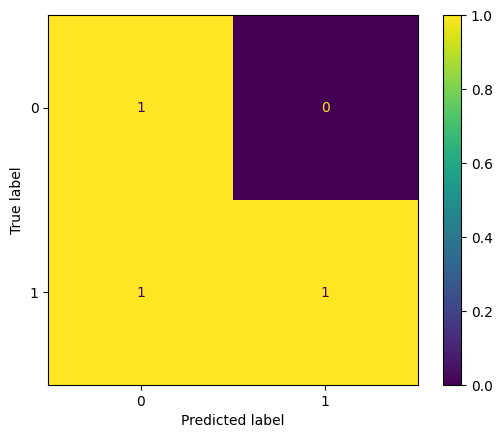

In [21]:
from sklearn.metrics import auc, roc_curve, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay
from scripts.dataset_loader import tiff_to_tensor
import numpy as np
with torch.no_grad():
    model.eval()
    targets = []
    all_targets = []
    outs = []
    all_outs = []
    for sample in specific_test_paths:
        fov_outs = []
        if sample:
            for fov in sample:
                # De-nest fov paths and get the indexed item path
                score = fov[1]
                combined_image = torch.cat([tiff_to_tensor(channel) for channel in fov[0]], dim=0).unsqueeze(0)
                y = model(combined_image).item()
                all_outs.append(y)
                fov_outs.append(y)
                all_targets.append(1 if score > 25 else 0)
            targets.append(1 if score > 25 else 0)
            outs.append(np.min(fov_outs))
score_em(all_targets, all_outs)
score_em(targets, outs)

In [22]:
print(all_outs)

[0.0001045031167450361, 4.194909251964418e-06, 0.0003048111393582076, 0.0009440522408112884, 0.00013723511074203998, 3.5147338621754898e-06, 8.854844963934738e-07, 1.4171220641401305e-07, 0.0004785229975823313, 1.4170685062708799e-05, 2.0514689822448418e-06, 0.00039840448880568147, 0.0005454192869365215, 0.00018947951321024448, 0.00014197245764080435]


In [23]:
# best NADH_SHG = 0.5153061224489796
# epoch500 NADH_SHG =

In [24]:
print(fov_outs)

[2.0514689822448418e-06, 0.00039840448880568147, 0.0005454192869365215, 0.00018947951321024448, 0.00014197245764080435]


In [25]:
print(targets)

[1, 1, 0]


In [26]:
print(outs)

[np.float64(4.194909251964418e-06), np.float64(1.4171220641401305e-07), np.float64(2.0514689822448418e-06)]


In [27]:
input_channels = ['nadh','shg']
# Load full dataset
full_dataset = MicroscopyDataset(
    csv_file="../data/newData/labels.csv",
    root_dir="../data/newData",
    channels = input_channels,
    transform=None
)

Total samples found: 290


In [28]:
print(full_dataset.sample_wise_paths)

[[(['../data/newData\\Sample_001\\fov1\\nadh.tiff', '../data/newData\\Sample_001\\fov1\\shg.tiff'], 77), (['../data/newData\\Sample_001\\fov2\\nadh.tiff', '../data/newData\\Sample_001\\fov2\\shg.tiff'], 77), (['../data/newData\\Sample_001\\fov3\\nadh.tiff', '../data/newData\\Sample_001\\fov3\\shg.tiff'], 77), (['../data/newData\\Sample_001\\fov4\\nadh.tiff', '../data/newData\\Sample_001\\fov4\\shg.tiff'], 77), (['../data/newData\\Sample_001\\fov5\\nadh.tiff', '../data/newData\\Sample_001\\fov5\\shg.tiff'], 77)], [(['../data/newData\\Sample_002\\fov1\\nadh.tiff', '../data/newData\\Sample_002\\fov1\\shg.tiff'], 28), (['../data/newData\\Sample_002\\fov2\\nadh.tiff', '../data/newData\\Sample_002\\fov2\\shg.tiff'], 28), (['../data/newData\\Sample_002\\fov3\\nadh.tiff', '../data/newData\\Sample_002\\fov3\\shg.tiff'], 28), (['../data/newData\\Sample_002\\fov4\\nadh.tiff', '../data/newData\\Sample_002\\fov4\\shg.tiff'], 28), (['../data/newData\\Sample_002\\fov5\\nadh.tiff', '../data/newData\\S

In [29]:
samples_list = full_dataset.sample_wise_paths
print(samples_list)

[[(['../data/newData\\Sample_001\\fov1\\nadh.tiff', '../data/newData\\Sample_001\\fov1\\shg.tiff'], 77), (['../data/newData\\Sample_001\\fov2\\nadh.tiff', '../data/newData\\Sample_001\\fov2\\shg.tiff'], 77), (['../data/newData\\Sample_001\\fov3\\nadh.tiff', '../data/newData\\Sample_001\\fov3\\shg.tiff'], 77), (['../data/newData\\Sample_001\\fov4\\nadh.tiff', '../data/newData\\Sample_001\\fov4\\shg.tiff'], 77), (['../data/newData\\Sample_001\\fov5\\nadh.tiff', '../data/newData\\Sample_001\\fov5\\shg.tiff'], 77)], [(['../data/newData\\Sample_002\\fov1\\nadh.tiff', '../data/newData\\Sample_002\\fov1\\shg.tiff'], 28), (['../data/newData\\Sample_002\\fov2\\nadh.tiff', '../data/newData\\Sample_002\\fov2\\shg.tiff'], 28), (['../data/newData\\Sample_002\\fov3\\nadh.tiff', '../data/newData\\Sample_002\\fov3\\shg.tiff'], 28), (['../data/newData\\Sample_002\\fov4\\nadh.tiff', '../data/newData\\Sample_002\\fov4\\shg.tiff'], 28), (['../data/newData\\Sample_002\\fov5\\nadh.tiff', '../data/newData\\S

In [30]:
import random
random.shuffle(samples_list)
print(samples_list)

[[(['../data/newData\\Sample_001\\fov1\\nadh.tiff', '../data/newData\\Sample_001\\fov1\\shg.tiff'], 77), (['../data/newData\\Sample_001\\fov2\\nadh.tiff', '../data/newData\\Sample_001\\fov2\\shg.tiff'], 77), (['../data/newData\\Sample_001\\fov3\\nadh.tiff', '../data/newData\\Sample_001\\fov3\\shg.tiff'], 77), (['../data/newData\\Sample_001\\fov4\\nadh.tiff', '../data/newData\\Sample_001\\fov4\\shg.tiff'], 77), (['../data/newData\\Sample_001\\fov5\\nadh.tiff', '../data/newData\\Sample_001\\fov5\\shg.tiff'], 77)], [(['../data/newData\\Sample_028\\fov1\\nadh.tiff', '../data/newData\\Sample_028\\fov1\\shg.tiff'], 28), (['../data/newData\\Sample_028\\fov2\\nadh.tiff', '../data/newData\\Sample_028\\fov2\\shg.tiff'], 28), (['../data/newData\\Sample_028\\fov3\\nadh.tiff', '../data/newData\\Sample_028\\fov3\\shg.tiff'], 28), (['../data/newData\\Sample_028\\fov4\\nadh.tiff', '../data/newData\\Sample_028\\fov4\\shg.tiff'], 28), (['../data/newData\\Sample_028\\fov5\\nadh.tiff', '../data/newData\\S

In [31]:
import torchvision.transforms.v2 as tvt
# Transformations for training set
train_transform = tvt.Compose([
    tvt.RandomVerticalFlip(p=0.25),
    tvt.RandomHorizontalFlip(p=0.25),
    tvt.RandomRotation(degrees=(-180, 180))])
full_dataset.transform = train_transform

In [32]:
total_samples = len(samples_list)
train_size = int(0.7 * total_samples)
val_size = int(0.2 * total_samples)
test_size = total_samples - train_size - val_size

indices = torch.utils.data.SubsetRandomSampler(range(len(samples_list)))
print(indices)
indices = [i for i in indices]
print(indices)

[28, 22, 23, 25, 15, 18, 11, 12, 16, 7, 14, 9, 6, 20, 10, 24, 19, 8, 4, 26, 21, 1, 27, 13, 2, 0, 17, 3, 5]


In [33]:
for i in indices:
    if samples_list[i][0][1] > 25:
        print(f"Sample_{(i+1):03} has a HIGH score")
    else:
        print(f"Sample_{(i+1):03} has a LOW score")

Sample_029 has a LOW score
Sample_023 has a LOW score
Sample_024 has a LOW score
Sample_026 has a HIGH score
Sample_016 has a HIGH score
Sample_019 has a LOW score
Sample_012 has a LOW score
Sample_013 has a LOW score
Sample_017 has a LOW score
Sample_008 has a HIGH score
Sample_015 has a LOW score
Sample_010 has a HIGH score
Sample_007 has a HIGH score
Sample_021 has a HIGH score
Sample_011 has a HIGH score
Sample_025 has a LOW score
Sample_020 has a HIGH score
Sample_009 has a LOW score
Sample_005 has a LOW score
Sample_027 has a HIGH score
Sample_022 has a LOW score
Sample_002 has a HIGH score
Sample_028 has a HIGH score
Sample_014 has a HIGH score
Sample_003 has a HIGH score
Sample_001 has a HIGH score
Sample_018 has a LOW score
Sample_004 has a LOW score
Sample_006 has a LOW score


In [34]:
print(indices)

[28, 22, 23, 25, 15, 18, 11, 12, 16, 7, 14, 9, 6, 20, 10, 24, 19, 8, 4, 26, 21, 1, 27, 13, 2, 0, 17, 3, 5]


In [35]:
sample_id = full_dataset.data_frame['sample_id'].iloc[9]
for i, fov_path in enumerate(full_dataset._denest()):
        print(fov_path[0][0])

../data/newData\Sample_001\fov1\nadh.tiff
../data/newData\Sample_001\fov2\nadh.tiff
../data/newData\Sample_001\fov3\nadh.tiff
../data/newData\Sample_001\fov4\nadh.tiff
../data/newData\Sample_001\fov5\nadh.tiff
../data/newData\Sample_028\fov1\nadh.tiff
../data/newData\Sample_028\fov2\nadh.tiff
../data/newData\Sample_028\fov3\nadh.tiff
../data/newData\Sample_028\fov4\nadh.tiff
../data/newData\Sample_028\fov5\nadh.tiff
../data/newData\Sample_003\fov1\nadh.tiff
../data/newData\Sample_003\fov2\nadh.tiff
../data/newData\Sample_003\fov3\nadh.tiff
../data/newData\Sample_003\fov4\nadh.tiff
../data/newData\Sample_003\fov5\nadh.tiff
../data/newData\Sample_006\fov1\nadh.tiff
../data/newData\Sample_006\fov2\nadh.tiff
../data/newData\Sample_006\fov3\nadh.tiff
../data/newData\Sample_006\fov4\nadh.tiff
../data/newData\Sample_006\fov5\nadh.tiff
../data/newData\Sample_020\fov1\nadh.tiff
../data/newData\Sample_020\fov2\nadh.tiff
../data/newData\Sample_020\fov3\nadh.tiff
../data/newData\Sample_020\fov4\na

In [36]:
print(indices)
train_samples = indices[:train_size]
print(f"Train samples: {train_samples}")
train_indices = [full_dataset.get_sample_indices(sample) for sample in train_samples]
train_indices = [i for sublist in train_indices for i in sublist]
print(f"Train indices: {train_indices}")
train_data = torch.utils.data.Subset(full_dataset, train_indices)


val_samples = indices[train_size:train_size+val_size]
print(f"Val samples: {val_samples}")
val_indices = [full_dataset.get_sample_indices(sample) for sample in val_samples]
val_indices = [i for sublist in val_indices for i in sublist]
print(f"Val indices: {val_indices}")
val_data = torch.utils.data.Subset(full_dataset, val_indices)

test_samples = indices[train_size+val_size:]
print(f"Test samples: {test_samples}")
test_indices = [full_dataset.get_sample_indices(sample) for sample in test_samples]
test_indices = [i for sublist in test_indices for i in sublist]
print(f"Test indices: {test_indices}")
test_data = torch.utils.data.Subset(full_dataset, test_indices)

[28, 22, 23, 25, 15, 18, 11, 12, 16, 7, 14, 9, 6, 20, 10, 24, 19, 8, 4, 26, 21, 1, 27, 13, 2, 0, 17, 3, 5]
Train samples: [28, 22, 23, 25, 15, 18, 11, 12, 16, 7, 14, 9, 6, 20, 10, 24, 19, 8, 4, 26]
Train indices: [80, 81, 82, 83, 84, 105, 106, 107, 108, 109, 90, 91, 92, 93, 94, 125, 126, 127, 128, 129, 25, 26, 27, 28, 29, 55, 56, 57, 58, 59, 110, 111, 112, 113, 114, 135, 136, 137, 138, 139, 35, 36, 37, 38, 39, 60, 61, 62, 63, 64, 30, 31, 32, 33, 34, 65, 66, 67, 68, 69, 95, 96, 97, 98, 99, 50, 51, 52, 53, 54, 120, 121, 122, 123, 124, 70, 71, 72, 73, 74, 20, 21, 22, 23, 24, 40, 41, 42, 43, 44, 130, 131, 132, 133, 134, 5, 6, 7, 8, 9]
Val samples: [21, 1, 27, 13, 2]
Val indices: [75, 76, 77, 78, 79, 100, 101, 102, 103, 104, 45, 46, 47, 48, 49, 140, 141, 142, 143, 144, 10, 11, 12, 13, 14]
Test samples: [0, 17, 3, 5]
Test indices: [0, 1, 2, 3, 4, 85, 86, 87, 88, 89, 115, 116, 117, 118, 119, 15, 16, 17, 18, 19]


In [39]:
for i in test_samples:
    for sample_path in full_dataset.sample_wise_paths[i]:
        print(sample_path)

(['../data/newData\\Sample_001\\fov1\\nadh.tiff', '../data/newData\\Sample_001\\fov1\\shg.tiff'], 77)
(['../data/newData\\Sample_001\\fov2\\nadh.tiff', '../data/newData\\Sample_001\\fov2\\shg.tiff'], 77)
(['../data/newData\\Sample_001\\fov3\\nadh.tiff', '../data/newData\\Sample_001\\fov3\\shg.tiff'], 77)
(['../data/newData\\Sample_001\\fov4\\nadh.tiff', '../data/newData\\Sample_001\\fov4\\shg.tiff'], 77)
(['../data/newData\\Sample_001\\fov5\\nadh.tiff', '../data/newData\\Sample_001\\fov5\\shg.tiff'], 77)
(['../data/newData\\Sample_018\\fov1\\nadh.tiff', '../data/newData\\Sample_018\\fov1\\shg.tiff'], 0)
(['../data/newData\\Sample_018\\fov2\\nadh.tiff', '../data/newData\\Sample_018\\fov2\\shg.tiff'], 0)
(['../data/newData\\Sample_018\\fov3\\nadh.tiff', '../data/newData\\Sample_018\\fov3\\shg.tiff'], 0)
(['../data/newData\\Sample_018\\fov4\\nadh.tiff', '../data/newData\\Sample_018\\fov4\\shg.tiff'], 0)
(['../data/newData\\Sample_018\\fov5\\nadh.tiff', '../data/newData\\Sample_018\\fov5\\

In [44]:
dataloaders = {
    'train': DataLoader(train_data, batch_size=16, shuffle=True),
    'val': DataLoader(val_data, batch_size=16, shuffle=False),
    'test': DataLoader(test_data, batch_size=16, shuffle=False)
}

In [45]:
for images, labels in dataloaders['train']:
    print(labels)

tensor([ 8, 30, 52, 28,  8,  3, 52,  8, 30, 10, 28,  6, 10, 28,  3, 30])
tensor([10,  7, 27, 10, 10, 52,  7, 27,  8,  7, 52,  8, 30,  7,  3, 27])
tensor([52, 10, 28,  8, 27, 27,  8,  4,  8,  7,  8,  7, 61, 77, 10, 28])
tensor([ 4,  6, 52,  7,  4,  7,  4, 77, 77, 28,  7, 52,  8, 30,  3, 61])
tensor([ 6, 30, 77,  3, 27, 30,  7,  8, 10, 28,  4, 28,  6, 77, 52, 61])
tensor([27, 10, 61, 27, 52, 28, 52, 61,  8,  6, 27, 30,  8, 30, 28,  8])
tensor([27, 10,  8, 30])


In [ ]:
total_samples = len(samples_list)
train_size = int(0.7 * total_samples)
val_size = int(0.2 * total_samples)
test_size = total_samples - train_size - val_size
print(f"Total samples: {total_samples}, train_size: {train_size}, val_size: {val_size}, test_size: {test_size}")

In [ ]:
train_samples = samples_list[:train_size]
val_samples = samples_list[train_size:train_size+val_size]
test_samples = samples_list[train_size+val_size:]
print(f"Train samples: {train_samples}\n\nval samples: {val_samples}\n\ntest samples: {test_samples}")

In [ ]:
for sample in test_data:
    for fov in sample:
        score = fov[1]
        print(score)